In [31]:
import pandas as pd
import numpy as np

Loading the Dataset

In [32]:
df = pd.read_csv("/Users/mdnaif/Desktop/Telco Churn Prediction/data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

Understanding the Dataset

In [33]:
print(f" Shape: {df.shape} \n Size: {df.size}")

 Shape: (7043, 21) 
 Size: 147903


as we can observe from above that there are :
- 7043 Rows & 21 Columns
- The dataset is of 147903 in Size

In [34]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


- customerID is of no use to us so we will drop it.
- extensive useage of encoding is required as most columns seems to be object type.
- it is a binary classifcation problem statement as there are 2 outputs in the Churn Column.

In [35]:
df.drop(columns="customerID",inplace=True)

In [36]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


- there does'nt seem to be any null value but we will crosscheck just in case.
- majority of columns are object data type.
- only 3 columns are numerical.

In [38]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


we can observe from the above dataset that:
- Senior Citizen is already binary encoded : 0 & 1
- tenure : min value = 0.00 month, max value = 72 months
- monthly charges : min value = 18.25, max value = 118.75

as observed from above we can say that customers tenure ranged between 0 to 6 years, which gives us the insight that  few customers left early without even staying for a full month and the average customers stayed for 2 years 8 month while some stayed loyal and conntined the service for 6 years. The monthy charges ranged between $18.25 the cheapest package and some opting for premium packages at $118.75 with the average customer churn price being $64.76. 

In [39]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- dataset is clear of null values.

In [40]:
print(f"Duplicated Rows : {df.duplicated().sum()}")

Duplicated Rows : 22


- without dropping the customerID it showed 0 duplicates
- after droping the customerID it showed 22 duplicates

what this means is that with customerID we were able to uniquely identify customers, since we dropped it we seem to observe 22 duplicate rows which represents simmilar customer behaviour so we don't need to worry about it.

In [41]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

- the dataset is highly imbalanced.
- we can observe that: customers that stayed > customer that left
- to adress this issue we need to balance the data before training model with the data.

In [42]:
imbal_ratio = 5174 / 1869
print(imbal_ratio)

2.7683253076511503


In [43]:
for col in df.columns:
    print(f"Columns: {col}")
    print(df[col].unique())

Columns: gender
['Female' 'Male']
Columns: SeniorCitizen
[0 1]
Columns: Partner
['Yes' 'No']
Columns: Dependents
['No' 'Yes']
Columns: tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Columns: PhoneService
['No' 'Yes']
Columns: MultipleLines
['No phone service' 'No' 'Yes']
Columns: InternetService
['DSL' 'Fiber optic' 'No']
Columns: OnlineSecurity
['No' 'Yes' 'No internet service']
Columns: OnlineBackup
['Yes' 'No' 'No internet service']
Columns: DeviceProtection
['No' 'Yes' 'No internet service']
Columns: TechSupport
['No' 'Yes' 'No internet service']
Columns: StreamingTV
['No' 'Yes' 'No internet service']
Columns: StreamingMovies
['No' 'Yes' 'No internet service']
Columns: Contract
['Month-to-month' 'One year' 'Two year']
Columns: PaperlessBilling
['Yes' 'No']
Columns: PaymentMethod
['Electronic check' 'M

the above loop gives us unique values of each columns which helps us understand the value ranges of each. Instead of One Hot Encoding everything we will use map to handle binary values like yes:no, and for more than two values in a column we will use OHE. We could have used OHE for every object column but doing that will add up extra columns (for example : initial =  5 columns, after OHE = 10 columns), which would increase the dimension of the data as well as cost more computational speed and cost while converging. Though, we need to make sure that we only map out binary feature columns.  

Preprocessing

In [44]:
df["gender"] = df["gender"].map({"Female" : 1, "Male" : 0})
mapped = df[["Partner","Dependents","PhoneService","PaperlessBilling","Churn"]]

for col in mapped:
    df[col] = df[col].map({"Yes" : 1, "No" : 0})

In [45]:
for col in df.columns:
    print(f"Columns: {col}")
    print(df[col].unique())

Columns: gender
[1 0]
Columns: SeniorCitizen
[0 1]
Columns: Partner
[1 0]
Columns: Dependents
[0 1]
Columns: tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Columns: PhoneService
[0 1]
Columns: MultipleLines
['No phone service' 'No' 'Yes']
Columns: InternetService
['DSL' 'Fiber optic' 'No']
Columns: OnlineSecurity
['No' 'Yes' 'No internet service']
Columns: OnlineBackup
['Yes' 'No' 'No internet service']
Columns: DeviceProtection
['No' 'Yes' 'No internet service']
Columns: TechSupport
['No' 'Yes' 'No internet service']
Columns: StreamingTV
['No' 'Yes' 'No internet service']
Columns: StreamingMovies
['No' 'Yes' 'No internet service']
Columns: Contract
['Month-to-month' 'One year' 'Two year']
Columns: PaperlessBilling
[1 0]
Columns: PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'

In [46]:
print(df["gender"])

0       1
1       0
2       0
3       0
4       1
       ..
7038    0
7039    1
7040    1
7041    0
7042    0
Name: gender, Length: 7043, dtype: int64


In [47]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)

In [48]:
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cat = ["MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
          "DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
          "Contract","PaymentMethod","TotalCharges"]

num = ["gender","SeniorCitizen","Partner","Dependents","PhoneService","PaperlessBilling"]

preprocessor = ColumnTransformer(
    transformers=
    [("cat",OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
     ("num", "passthrough", num)
     ]
)

In [49]:
from xgboost import XGBClassifier

model = XGBClassifier(
    random_state=42,
    objective="binary:logistic",
    tree_method="hist",
    eval_metric="logloss"
)

pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", model)
])

In [50]:
pipe.named_steps

{'preprocess': ColumnTransformer(transformers=[('cat',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  ['MultipleLines', 'InternetService',
                                   'OnlineSecurity', 'OnlineBackup',
                                   'DeviceProtection', 'TechSupport',
                                   'StreamingTV', 'StreamingMovies', 'Contract',
                                   'PaymentMethod', 'TotalCharges']),
                                 ('num', 'passthrough',
                                  ['gender', 'SeniorCitizen', 'Partner',
                                   'Dependents', 'PhoneService',
                                   'PaperlessBilling'])]),
 'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_ro

In [51]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    "model__n_estimators" : [300,400,500],
    "model__max_depth" : [3,4,5],
    "model__learning_rate" : [0.01,0.03,0.05],
    "model__subsample" : [0.6,0.7],
    "model__colsample_bytree" : [0.7,0.8,0.9],
    "model__min_child_weight" : [1,2,3],
    "model__scale_pos_weight" : [2,2.5,2.7,3]
}

In [52]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [53]:
grid = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=params,
    cv=cv,
    scoring = "f1",
    n_iter= 50,
    n_jobs= -1,
    verbose=1,
    error_score= "raise"
)

In [54]:

from imblearn.over_sampling import SMOTE

imb_pipe = Pipeline([
    ("preprocess", preprocessor),
    ("model", XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        use_label_encoder=False,
        tree_method = "hist",
        random_state=42,
        n_jobs=-1
    ))
])

grid = RandomizedSearchCV(
    estimator=imb_pipe,
    param_distributions=params,
    cv=cv,
    scoring = "f1",
    n_iter= 20,
    n_jobs= -1,
    verbose=1,
    error_score= "raise"
)
grid.fit(X_train,y_train)
print("trained")

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for 

trained


In [55]:
best_model = grid.best_estimator_
print(grid.best_params_)

{'model__subsample': 0.6, 'model__scale_pos_weight': 2, 'model__n_estimators': 300, 'model__min_child_weight': 1, 'model__max_depth': 3, 'model__learning_rate': 0.01, 'model__colsample_bytree': 0.7}


In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

y_pred = best_model.predict(X_test)

print(f"Acccuracy : \n{accuracy_score(y_test,y_pred)}\n")
print(f"Confusion_matrix : \n{confusion_matrix(y_test,y_pred)}\n")
print(f"Classification_report : \n{classification_report(y_test,y_pred)}\n")

Acccuracy : 
0.7512776831345827

Confusion_matrix : 
[[978 316]
 [122 345]]

Classification_report : 
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1294
           1       0.52      0.74      0.61       467

    accuracy                           0.75      1761
   macro avg       0.71      0.75      0.71      1761
weighted avg       0.79      0.75      0.76      1761




In [57]:
print("Train acc:", best_model.score(X_train, y_train))
print("Test acc :", best_model.score(X_test, y_test))

Train acc: 0.7599394168875426
Test acc : 0.7512776831345827


In [58]:
from sklearn.metrics import roc_auc_score , roc_curve

y_prob = best_model.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_prob)


0.8266873297611445

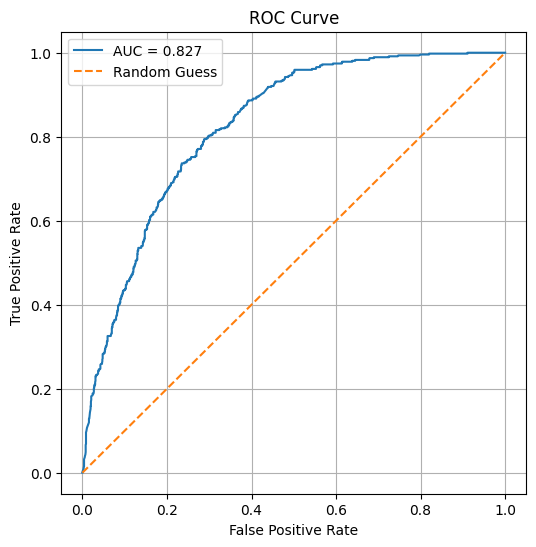

In [59]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()